In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import accuracy_score 


In [2]:
df=pd.read_csv("adult.csv")

In [3]:
df.head(20)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
df.tail(20)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
48822,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K
48823,51,Private,82720,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48824,22,Private,269623,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
48825,64,Self-emp-not-inc,136405,HS-grad,9,Widowed,Farming-fishing,Not-in-family,White,Male,0,0,32,United-States,<=50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,?,>50K
48827,55,Private,224655,HS-grad,9,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,32,United-States,<=50K
48828,38,Private,247547,Assoc-voc,11,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,<=50K
48829,58,Private,292710,Assoc-acdm,12,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,36,United-States,<=50K
48830,32,Private,173449,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
48831,48,Private,285570,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


It looks like index number 48838 has missing values which is marked as ?

In [5]:
df.columns

Index([' Age ', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    Age            48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-Num   48842 non-null  int64 
 5   Martial Status  48842 non-null  object
 6   Occupation      48842 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  Capital Loss    48842 non-null  int64 
 12  Hours per week  48842 non-null  int64 
 13  Country         48842 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Above dataframe has no missing values as missing values are marked as ?

In [7]:
df.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df1=pd.read_csv("adult.csv", na_values='?')

In [9]:
df1.head(50)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
df1.tail(50)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
48792,34,Federal-gov,408813,HS-grad,9,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40,United-States,>50K
48793,37,Private,115332,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,50,United-States,<=50K
48794,29,Local-gov,170482,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,2057,40,United-States,<=50K
48795,34,Private,113688,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,0,34,United-States,<=50K
48796,27,Private,133770,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Male,2202,0,52,Philippines,<=50K
48797,57,Private,161964,12th,8,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
48798,30,Private,34572,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,80,United-States,>50K
48799,21,Private,198259,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48801,57,Private,161944,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,>50K


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    Age            48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   Education       48842 non-null  object
 4   Education-Num   48842 non-null  int64 
 5   Martial Status  48842 non-null  object
 6   Occupation      46033 non-null  object
 7   Relationship    48842 non-null  object
 8   Race            48842 non-null  object
 9   Sex             48842 non-null  object
 10  Capital Gain    48842 non-null  int64 
 11  Capital Loss    48842 non-null  int64 
 12  Hours per week  48842 non-null  int64 
 13  Country         47985 non-null  object
 14  Target          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


From the above data, there are missing values in Workclass , Occupation and Country

In [12]:
df1.isnull().sum()

 Age                 0
Workclass         2799
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        2809
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            857
Target               0
dtype: int64

So, Workclass has 2799 missing values , Occupation has 2809 missing values , Country has 857 missing values. Total missing values in dataframe is 6,465

In [24]:
df2 = df1.dropna()

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0    Age            45222 non-null  int64 
 1   Workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   Education       45222 non-null  object
 4   Education-Num   45222 non-null  int64 
 5   Martial Status  45222 non-null  object
 6   Occupation      45222 non-null  object
 7   Relationship    45222 non-null  object
 8   Race            45222 non-null  object
 9   Sex             45222 non-null  object
 10  Capital Gain    45222 non-null  int64 
 11  Capital Loss    45222 non-null  int64 
 12  Hours per week  45222 non-null  int64 
 13  Country         45222 non-null  object
 14  Target          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


There are no missing values

In [26]:
print(df1.shape)

(48842, 15)


Before cleaning the data there was 48842 rows and 15 columns

In [27]:
print(df2.shape)

(45222, 15)


After cleaning the data there are 45222 rows and 15 columns

In [28]:
x=df1.describe()
x

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [29]:
df2.describe()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


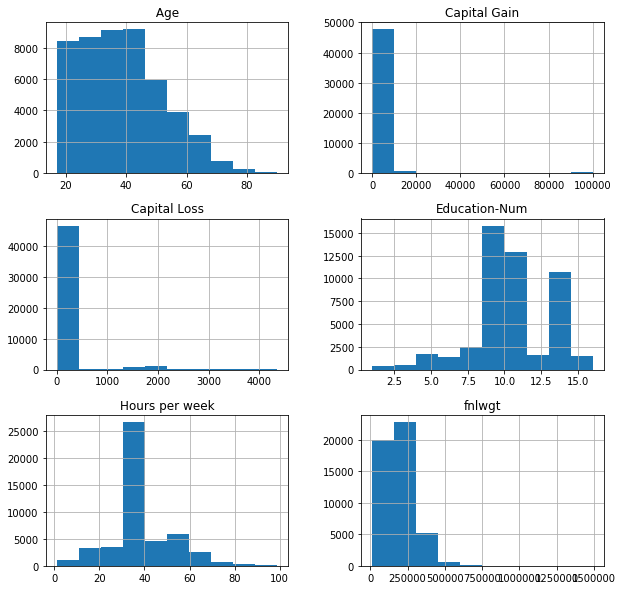

In [30]:
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(10,10))
Num = df1.select_dtypes(include=['int64', 'float64']).columns
Sub = df1[Num]
Sub.hist(ax=ax)
plt.show()

1. Most of the people age ranges are young and there 20 to 45 years. 2. Capital gain and Capital Loss is for very few Adults. 3. Most of the adults education level is that they went to some school and then to prof school. 4. Most of the people work for 40 hours a week

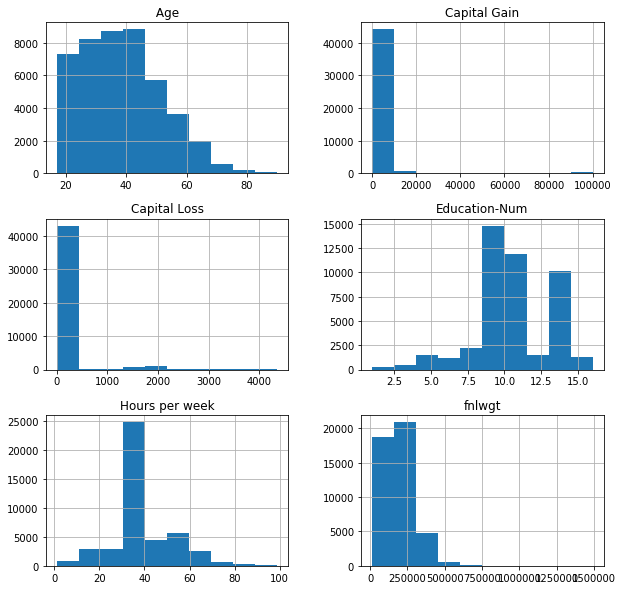

In [31]:
fig, ax  = plt.subplots(figsize=(10,10))
Num = df2.select_dtypes(include=['int64', 'float64']).columns
Sub = df2[Num]
Sub.hist(ax=ax)
plt.show()

1. Most of the people age ranges are young and there 20 to 45 years. 2. Capital gain and Capital Loss is for very few Adults. 3. Most of the adults education level is that they went to some school and then to prof school. 4. Most of the people work for 40 hours a week

In [32]:
plot=df2['Sex'].value_counts()
plot

Male      30527
Female    14695
Name: Sex, dtype: int64

In [33]:
null_data = df1[df1.isnull().any(axis=1)]
null_data

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,<=50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K


In [34]:
null_data.describe() #missing data values

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,3620.000000,3.620000e+03,3620.000000,3620.000000,3620.000000,3620.000000
mean,39.838398,1.887822e+05,9.573757,799.706630,73.846961,33.980939
std,18.768381,1.051742e+05,2.737745,6730.046313,377.562831,15.027208
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,22.000000,1.197428e+05,9.000000,0.000000,0.000000,24.000000
50%,35.000000,1.771325e+05,10.000000,0.000000,0.000000,40.000000
75%,57.000000,2.331475e+05,10.000000,0.000000,0.000000,40.000000
max,90.000000,1.024535e+06,16.000000,99999.000000,4356.000000,99.000000


In [35]:
df1.describe() #Df1 origianl data

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


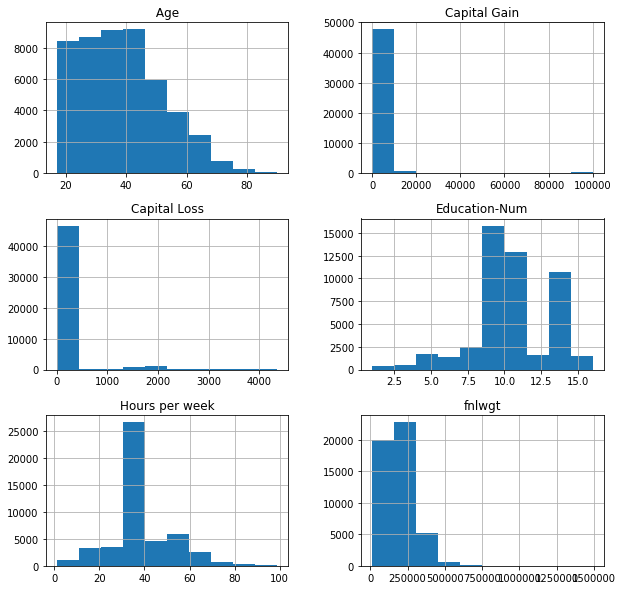

In [36]:
fig, ax  = plt.subplots(figsize=(10,10))
Num = df1.select_dtypes(include=['int64', 'float64']).columns
Sub = df1[Num]
Sub.hist(ax=ax)
plt.show()

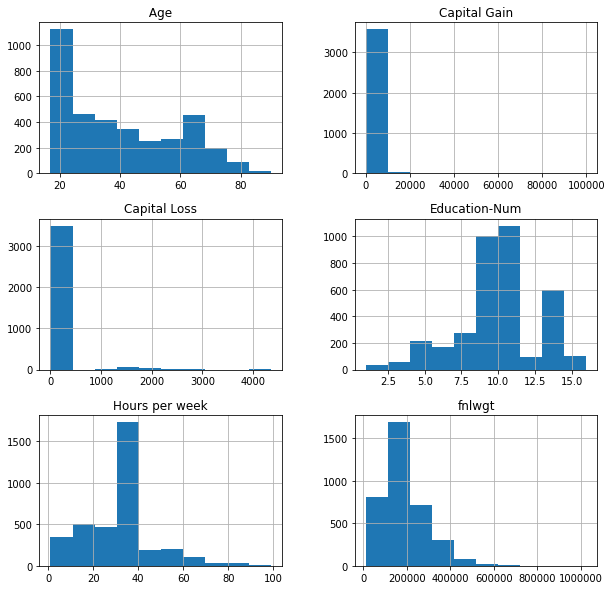

In [37]:
fig, ax  = plt.subplots(figsize=(10,10))
Num = null_data.select_dtypes(include=['int64', 'float64']).columns
Sub = null_data[Num]
Sub.hist(ax=ax)
plt.show()

In [38]:
df2.columns

Index([' Age ', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target'],
      dtype='object')

In [39]:
df2.replace({'Target':{'<=50K':0, '>50K':1}}, inplace=True)
df2.head(10)
#conversion of Target to 0 for <=50K and 1 for >50K

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [40]:
null_data.replace({'Target':{'<=50K':0, '>50K':1}}, inplace=True)
null_data.head(10)
#conversion of Target to 0 for <=50K and 1 for >50K

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,1
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,1
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,1
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,NaN,0
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,0
69,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
77,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,0
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,NaN,0
106,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,0
128,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0


In [41]:
df1.replace({'Target':{'<=50K':0, '>50K':1}}, inplace=True)
df1.head(10)


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [42]:
x=print(df2[['Country','Target']].groupby(['Country']).mean())#cleaned data

                              Target
Country                             
Cambodia                    0.346154
Canada                      0.368098
China                       0.318584
Columbia                    0.048780
Cuba                        0.255639
Dominican-Republic          0.051546
Ecuador                     0.139535
El-Salvador                 0.074830
England                     0.394958
France                      0.444444
Germany                     0.300518
Greece                      0.367347
Guatemala                   0.034884
Haiti                       0.130435
Holand-Netherlands          0.000000
Honduras                    0.105263
Hong                        0.285714
Hungary                     0.333333
India                       0.421769
Iran                        0.392857
Ireland                     0.277778
Italy                       0.330000
Jamaica                     0.135922
Japan                       0.348315
Laos                        0.095238
M

County wise % who has salary more >50K

In [43]:
print(null_data[['Country','Target']].groupby(['Country']).mean())#Null_Values

                              Target
Country                             
Cambodia                    0.000000
Canada                      0.157895
China                       0.000000
Columbia                    0.000000
Cuba                        0.000000
Dominican-Republic          0.000000
Ecuador                     0.000000
El-Salvador                 0.000000
England                     0.000000
France                      0.000000
Germany                     0.000000
Guatemala                   0.000000
Haiti                       0.000000
Honduras                    0.000000
Hong                        0.000000
Hungary                     0.000000
India                       0.000000
Iran                        0.000000
Ireland                     1.000000
Italy                       0.200000
Jamaica                     0.333333
Japan                       0.333333
Laos                        0.000000
Mexico                      0.000000
Nicaragua                   0.000000
O

Mostly the data which have been removed have salary <=50K and most population are of age group 20 and 50+

In [44]:
plot=df2['Country'].value_counts()
plot

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
India                           147
El-Salvador                     147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [45]:
p=null_data['Country'].value_counts()
p

United-States                 2540
Mexico                          48
Canada                          19
South                           14
Germany                         13
Philippines                     12
Taiwan                          10
China                            9
Puerto-Rico                      9
England                          8
El-Salvador                      8
Haiti                            6
Dominican-Republic               6
Poland                           6
Portugal                         5
Cuba                             5
Italy                            5
India                            4
Jamaica                          3
Japan                            3
Vietnam                          3
Iran                             3
Columbia                         3
Laos                             2
Cambodia                         2
Ecuador                          2
France                           2
Guatemala                        2
Hong                

In [46]:
x=print(df2[['Sex','Target']].groupby(['Sex']).mean())#cleaned data

          Target
Sex             
Female  0.113576
Male    0.312477


In [47]:
y=print(null_data[['Sex','Target']].groupby(['Sex']).mean())#Removed Data

          Target
Sex             
Female  0.066800
Male    0.178521


In [48]:
print(df2[['Race','Target','Sex']].groupby(['Race','Sex']).mean())

                             Target
Race               Sex             
Amer-Indian-Eskimo Female  0.084337
                   Male    0.144981
Asian-Pac-Islander Female  0.149083
                   Male    0.350634
Black              Female  0.060461
                   Male    0.190299
Other              Female  0.071429
                   Male    0.158590
White              Female  0.122444
                   Male    0.323908


In [49]:
print(null_data[['Race','Target','Sex']].groupby(['Race','Sex']).mean())

                             Target
Race               Sex             
Amer-Indian-Eskimo Female  0.052632
                   Male    0.062500
Asian-Pac-Islander Female  0.049383
                   Male    0.266667
Black              Female  0.026786
                   Male    0.111588
Other              Female  0.068966
                   Male    0.125000
White              Female  0.076049
                   Male    0.182507


In [50]:
print(df2[['Education','Target','Sex']].groupby(['Education','Sex']).mean())

                       Target
Education    Sex             
10th         Female  0.007673
             Male    0.094952
11th         Female  0.019784
             Male    0.073377
12th         Female  0.011173
             Male    0.103015
1st-4th      Female  0.000000
             Male    0.048193
5th-6th      Female  0.036697
             Male    0.052941
7th-8th      Female  0.005076
             Male    0.086262
9th          Female  0.026738
             Male    0.067485
Assoc-acdm   Female  0.136752
             Male    0.344902
Assoc-voc    Female  0.128889
             Male    0.324766
Bachelors    Female  0.210730
             Male    0.512786
Doctorate    Female  0.583333
             Male    0.770642
HS-grad      Female  0.066509
             Male    0.208062
Masters      Female  0.341220
             Male    0.654004
Preschool    Female  0.000000
             Male    0.019231
Prof-school  Female  0.500000
             Male    0.801815
Some-college Female  0.074313
          

In [51]:
print(null_data[['Education','Target','Sex']].groupby(['Education','Sex']).mean())

                       Target
Education    Sex             
10th         Female  0.015152
             Male    0.040000
11th         Female  0.000000
             Male    0.030303
12th         Female  0.062500
             Male    0.062500
1st-4th      Female  0.000000
             Male    0.000000
5th-6th      Female  0.000000
             Male    0.119048
7th-8th      Female  0.000000
             Male    0.077778
9th          Female  0.000000
             Male    0.063830
Assoc-acdm   Female  0.142857
             Male    0.173077
Assoc-voc    Female  0.101695
             Male    0.279070
Bachelors    Female  0.204082
             Male    0.340909
Doctorate    Female  0.200000
             Male    0.688889
HS-grad      Female  0.045872
             Male    0.118584
Masters      Female  0.380952
             Male    0.495050
Preschool    Female  0.000000
             Male    0.000000
Prof-school  Female  0.125000
             Male    0.585366
Some-college Female  0.036638
          

Text(0.5, 1, 'HEAT MAP')

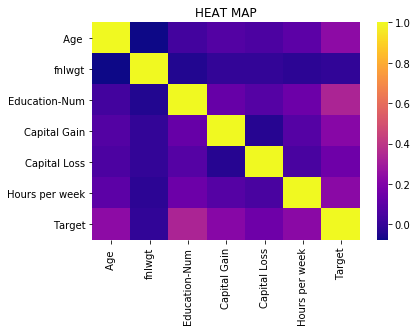

In [52]:
sns.heatmap(df2.corr(),cmap='plasma')
plt.title('HEAT MAP')

In [53]:
df3=df2
df3.replace({'Sex':{'Male':0, 'Female':1}}, inplace=True)
df3.replace({'Race':{'White':0, 'Amer-Indian-Eskimo':1, 'Asian-Pac-Islander':2, 'Black':3, 'Other':4}},inplace=True)
df3.head(10)
#0:Male      #0. White    #1.Amer Indian #2.Asian Pac Islander  #3.Black  #4.Other
#1:Female   

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,3,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,0,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,5178,0,40,United-States,1


In [54]:
x=df2[["Education", "Education-Num"]].head(15)
print(x)
y=df2[["Relationship", "Sex"]].head(15)
print(y)

       Education  Education-Num
0      Bachelors             13
1      Bachelors             13
2        HS-grad              9
3           11th              7
4      Bachelors             13
5        Masters             14
6            9th              5
7        HS-grad              9
8        Masters             14
9      Bachelors             13
10  Some-college             10
11     Bachelors             13
12     Bachelors             13
13    Assoc-acdm             12
15       7th-8th              4
     Relationship  Sex
0   Not-in-family    0
1         Husband    0
2   Not-in-family    0
3         Husband    0
4            Wife    1
5            Wife    1
6   Not-in-family    1
7         Husband    0
8   Not-in-family    1
9         Husband    0
10        Husband    0
11        Husband    0
12      Own-child    1
13  Not-in-family    0
15        Husband    0


In [55]:
print(null_data[['Education','Target','Sex']].groupby(['Education','Sex']).mean()) #Data removed

                       Target
Education    Sex             
10th         Female  0.015152
             Male    0.040000
11th         Female  0.000000
             Male    0.030303
12th         Female  0.062500
             Male    0.062500
1st-4th      Female  0.000000
             Male    0.000000
5th-6th      Female  0.000000
             Male    0.119048
7th-8th      Female  0.000000
             Male    0.077778
9th          Female  0.000000
             Male    0.063830
Assoc-acdm   Female  0.142857
             Male    0.173077
Assoc-voc    Female  0.101695
             Male    0.279070
Bachelors    Female  0.204082
             Male    0.340909
Doctorate    Female  0.200000
             Male    0.688889
HS-grad      Female  0.045872
             Male    0.118584
Masters      Female  0.380952
             Male    0.495050
Preschool    Female  0.000000
             Male    0.000000
Prof-school  Female  0.125000
             Male    0.585366
Some-college Female  0.036638
          

In [56]:
print(df2[['Education','Target','Sex']].groupby(['Education','Sex']).mean()) #data cleaned

                    Target
Education    Sex          
10th         0    0.094952
             1    0.007673
11th         0    0.073377
             1    0.019784
12th         0    0.103015
             1    0.011173
1st-4th      0    0.048193
             1    0.000000
5th-6th      0    0.052941
             1    0.036697
7th-8th      0    0.086262
             1    0.005076
9th          0    0.067485
             1    0.026738
Assoc-acdm   0    0.344902
             1    0.136752
Assoc-voc    0    0.324766
             1    0.128889
Bachelors    0    0.512786
             1    0.210730
Doctorate    0    0.770642
             1    0.583333
HS-grad      0    0.208062
             1    0.066509
Masters      0    0.654004
             1    0.341220
Preschool    0    0.019231
             1    0.000000
Prof-school  0    0.801815
             1    0.500000
Some-college 0    0.277122
             1    0.074313


In [57]:
print(df1[['Education','Target','Sex']].groupby(['Education','Sex']).mean()) # original data


                       Target
Education    Sex             
10th         Female  0.008753
             Male    0.089056
11th         Female  0.016923
             Male    0.069707
12th         Female  0.018957
             Male    0.098655
1st-4th      Female  0.000000
             Male    0.043011
5th-6th      Female  0.031496
             Male    0.060209
7th-8th      Female  0.004184
             Male    0.085196
9th          Female  0.022727
             Male    0.067164
Assoc-acdm   Female  0.137161
             Male    0.335729
Assoc-voc    Female  0.126703
             Male    0.323286
Bachelors    Female  0.210335
             Male    0.503244
Doctorate    Female  0.566372
             Male    0.762994
HS-grad      Female  0.064744
             Male    0.203331
Masters      Female  0.343195
             Male    0.645143
Preschool    Female  0.000000
             Male    0.016949
Prof-school  Female  0.477273
             Male    0.789174
Some-college Female  0.070129
          

In [58]:
print(df1[['Race','Target']].groupby(['Race']).mean())# original data

                      Target
Race                        
Amer-Indian-Eskimo  0.117021
Asian-Pac-Islander  0.269256
Black               0.120811
Other               0.123153
White               0.253987


In [59]:
print(null_data[['Race','Target']].groupby(['Race']).mean()) # null data

                      Target
Race                        
Amer-Indian-Eskimo  0.057143
Asian-Pac-Islander  0.185185
Black               0.070022
Other               0.094340
White               0.139909


In [60]:
print(df2[['Race','Target']].groupby(['Race']).mean()) # Cleaned data-    #0. White    #1.Amer Indian #2.Asian Pac Islander  #3.Black  #4.Other
#1:Female   

        Target
Race          
0     0.262371
1     0.121839
2     0.283193
3     0.126301
4     0.127479


Overall, the data is baised towards towards Sex and Race. If sex is female then, its likely to get less 50K salary , also if the race is other than white and asian pac islander,its likely to get less than 50K Salary

In [61]:
df1.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [62]:
df1.replace({'Sex':{'Male':0, 'Female':1}}, inplace=True)
df1.replace({'Race':{'White':0, 'Amer-Indian-Eskimo':1, 'Asian-Pac-Islander':2, 'Black':3, 'Other':4}},inplace=True)
df1.head(10)
 #0. White    #1.Amer Indian #2.Asian Pac Islander  #3.Black  #4.Other
 #0. Male #Female

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,0,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,3,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,0,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,0,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,5178,0,40,United-States,1


In [63]:
x=print(df1[['Sex','Target']].groupby(['Sex']).mean())# original data
y=print(df2[['Sex','Target']].groupby(['Sex']).mean()) # Cleaned data


       Target
Sex          
0    0.303767
1    0.109251
       Target
Sex          
0    0.312477
1    0.113576


In [64]:
x1 = df1[['Sex','Target']].groupby(['Sex']).mean()   #original Data unpriveleged / privileged
(x1['Target'][1]/x1['Target'][0])

0.3596552625800337

Positive Unprivileged / Positive Privileged gets bias measure.

Above shown is measure of discrimination in the orginal data. A score of 1 indicates the dataset is discrimination-free. When calculated for Male versus Female, the score is 0.36.

 #0. Male #Female

In [65]:
x2 = df2[['Sex','Target']].groupby(['Sex']).mean()
#Cleaned Data
(x2['Target'][1]/x2['Target'][0])

0.3634695423643793

Above shown is measure of discrimination in the orginal data. A score of 1 indicates the dataset is discrimination-free. When calculated for Male versus Female, the score is 0.37.4. Thus the bias reduces as we remove the null vales data.

 #0. Male #1.Female

In [66]:
xo=print(df1[['Race','Target']].groupby(['Race']).mean()) #original data
yo=print(df2[['Race','Target']].groupby(['Race']).mean()) #cleaned data


        Target
Race          
0     0.253987
1     0.117021
2     0.269256
3     0.120811
4     0.123153
        Target
Race          
0     0.262371
1     0.121839
2     0.283193
3     0.126301
4     0.127479


In [67]:
x=df1[['Race','Target']].groupby(['Race']).mean() #original data     
x1=print(x['Target'][3]/x['Target'][0]) #Black - Unpriviliged/ White- Priviliged
x2=print(x['Target'][1]/x['Target'][0]) #Amer Indian/White
x3=print(x['Target'][2]/x['Target'][0]) #Asian Pac/White
x4=print(x['Target'][4]/x['Target'][0]) #Other/White
 


0.47565882219299216
0.4607374896946818
1.0601181117243244
0.4848782359079723


In [68]:
x=df2[['Race','Target']].groupby(['Race']).mean() #cleaned data     
x1=print(x['Target'][3]/x['Target'][0]) #Black - Unpriviliged/ White- Priviliged
x2=print(x['Target'][1]/x['Target'][0]) #Amer Indian/White
x3=print(x['Target'][2]/x['Target'][0]) #Asian Pac/White
x4=print(x['Target'][4]/x['Target'][0]) #Other/White
 

0.48138356271166044
0.4643779511243692
1.0793615144257538
0.48587302331816384


#0. White    #1.Amer Indian #2.Asian Pac Islander  #3.Black  #4.Other
Above measure is calculated among different races. Bias reduces as we remove the null values from the dataset. 



In [69]:
#HS-grad         9
#Some-college    10
#Bachelors       13
#Masters          14
#Assoc-voc        11
#11th             7
#Assoc-acdm       12
#10th             6
#7th-8th           4
#Prof-school       15
#9th               5
#12th              8
#Doctorate         16
#5th-6th           3
#1st-4th           2
#Preschool         1
x=print(df1[['Education-Num','Target']].groupby(['Education-Num']).mean()) #original data    



                 Target
Education-Num          
1              0.012048
2              0.032389
3              0.053045
4              0.064921
5              0.054233
6              0.062635
7              0.050773
8              0.073059
9              0.158578
10             0.189649
11             0.253275
12             0.257964
13             0.412835
14             0.549116
15             0.739808
16             0.725589


In [70]:
x=df1[['Education-Num','Target']].groupby(['Education-Num']).mean() #original data    
x1=print(x['Target'][11]/x['Target'][15]) 
x2=print(x['Target'][12]/x['Target'][15]) 
x3=print(x['Target'][13]/x['Target'][15]) 
x4=print(x['Target'][14]/x['Target'][15]) 
x5=print(x['Target'][16]/x['Target'][15]) 

0.3423524166094569
0.348690091383323
0.5580296581287205
0.7422404595914648
0.98078024982401


In [71]:
x=df2[['Education-Num','Target']].groupby(['Education-Num']).mean() #cleaned data   
x1=print(x['Target'][11]/x['Target'][15]) 
x2=print(x['Target'][12]/x['Target'][15]) 
x3=print(x['Target'][13]/x['Target'][15]) 
x4=print(x['Target'][14]/x['Target'][15]) 
x5=print(x['Target'][16]/x['Target'][15]) 

0.3411489590662638
0.3502013127925536
0.5566804420007854
0.7347401846954352
0.9725724115659776


In [72]:
#df1.replace({'Target':{'<=50K':0, '>50K':1}}, inplace=True)
#df1.head(10)
p=df1['Occupation'].value_counts()
p

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: Occupation, dtype: int64

In [73]:
df1.replace({'Occupation':{'Prof-specialty':0, 'Other-service':1,'Exec-managerial':2,'Sales':3,'Craft-repair':4,'Adm-clerical':5,'Machine-op-inspct':6,'Transport-moving':7,'Tech-support':8,'Handlers-cleaners':9,'Farming-fishing':10,'Priv-house-serv':11,'Protective-serv':12,'Armed-Forces':13}}, inplace=True)
df1.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,5.0,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,2.0,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,9.0,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,9.0,Husband,3,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,0.0,Wife,3,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,2.0,Wife,0,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,1.0,Not-in-family,3,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,2.0,Husband,0,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,0.0,Not-in-family,0,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,2.0,Husband,0,0,5178,0,40,United-States,1


In [74]:
df2.replace({'Occupation':{'Prof-specialty':0, 'Other-service':1,'Exec-managerial':2,'Sales':3,'Craft-repair':4,'Adm-clerical':5,'Machine-op-inspct':6,'Transport-moving':7,'Tech-support':8,'Handlers-cleaners':9,'Farming-fishing':10,'Priv-house-serv':11,'Protective-serv':12,'Armed-Forces':13}}, inplace=True)
df2.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,5,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,2,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,9,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,9,Husband,3,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,0,Wife,3,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,2,Wife,0,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,1,Not-in-family,3,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,2,Husband,0,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,0,Not-in-family,0,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,2,Husband,0,0,5178,0,40,United-States,1


In [75]:
x=print(df1[['Occupation','Target']].groupby(['Occupation']).mean()) # priviliged = 2 Exec Managerial --- Original
x1=print(df2[['Occupation','Target']].groupby(['Occupation']).mean()) #Cleaned

              Target
Occupation          
0.0         0.451069
1.0         0.041438
2.0         0.477818
3.0         0.267987
4.0         0.226276
5.0         0.136874
6.0         0.123097
7.0         0.204246
8.0         0.290456
9.0         0.066602
10.0        0.116107
11.0        0.012397
12.0        0.313327
13.0        0.333333
              Target
Occupation          
0           0.450067
1           0.040765
2           0.479111
3           0.269046
4           0.225083
5           0.136462
6           0.122896
7           0.206390
8           0.289437
9           0.065982
10          0.116216
11          0.012931
12          0.314549
13          0.285714


In [76]:
x=df1[['Occupation','Target']].groupby(['Occupation']).mean() #cleaned data   
x1=print(x['Target'][0]/x['Target'][2]) 
x2=print(x['Target'][1]/x['Target'][2]) 
x3=print(x['Target'][3]/x['Target'][2]) 
x4=print(x['Target'][4]/x['Target'][2]) 
x5=print(x['Target'][5]/x['Target'][2]) 
x6=print(x['Target'][6]/x['Target'][2]) 
x7=print(x['Target'][7]/x['Target'][2]) 
x8=print(x['Target'][8]/x['Target'][2]) 
x9=print(x['Target'][9]/x['Target'][2]) 
x10=print(x['Target'][10]/x['Target'][2]) 
x11=print(x['Target'][11]/x['Target'][2]) 
x12=print(x['Target'][12]/x['Target'][2]) 
x13=print(x['Target'][13]/x['Target'][2]) 



0.9440192697018348
0.08672371578708254
0.5608557037922651
0.4735614922186134
0.28645637854705225
0.2576238260095385
0.4274562886772561
0.6078809636601278
0.13938847965670526
0.24299502414076418
0.02594438823649778
0.6557446326197349
0.6976157725813846


In [77]:
x=df2[['Occupation','Target']].groupby(['Occupation']).mean() #cleaned data   
x1=print(x['Target'][0]/x['Target'][2]) 
x2=print(x['Target'][1]/x['Target'][2]) 
x3=print(x['Target'][3]/x['Target'][2]) 
x4=print(x['Target'][4]/x['Target'][2]) 
x5=print(x['Target'][5]/x['Target'][2]) 
x6=print(x['Target'][6]/x['Target'][2]) 
x7=print(x['Target'][7]/x['Target'][2]) 
x8=print(x['Target'][8]/x['Target'][2]) 
x9=print(x['Target'][9]/x['Target'][2]) 
x10=print(x['Target'][10]/x['Target'][2]) 
x11=print(x['Target'][11]/x['Target'][2]) 
x12=print(x['Target'][12]/x['Target'][2]) 
x13=print(x['Target'][13]/x['Target'][2])

0.9393785846287034
0.08508549000125938
0.5615522895713928
0.46979316706200813
0.28482356807641795
0.25650764123034786
0.43077772014701265
0.6041118703851992
0.1377184198386534
0.24256638920050153
0.026989644347690123
0.6565267858674457
0.5963426179680104


In [78]:
df1.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,5.0,Not-in-family,0,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,2.0,Husband,0,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,9.0,Not-in-family,0,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,9.0,Husband,3,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,0.0,Wife,3,1,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,2.0,Wife,0,1,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,1.0,Not-in-family,3,1,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,2.0,Husband,0,0,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,0.0,Not-in-family,0,1,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,2.0,Husband,0,0,5178,0,40,United-States,1


In [79]:
del df1['Workclass']
del df1['Education']
del df1['Martial Status']
del df1['Relationship']
del df1['Country']

In [80]:
del df2['Workclass']
del df2['Education']
del df2['Martial Status']
del df2['Relationship']
del df2['Country']

In [81]:
df1.head(10)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target
0,39,77516,13,5.0,0,0,2174,0,40,0
1,50,83311,13,2.0,0,0,0,0,13,0
2,38,215646,9,9.0,0,0,0,0,40,0
3,53,234721,7,9.0,3,0,0,0,40,0
4,28,338409,13,0.0,3,1,0,0,40,0
5,37,284582,14,2.0,0,1,0,0,40,0
6,49,160187,5,1.0,3,1,0,0,16,0
7,52,209642,9,2.0,0,0,0,0,45,1
8,31,45781,14,0.0,0,1,14084,0,50,1
9,42,159449,13,2.0,0,0,5178,0,40,1


In [82]:
df2.head(10)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target
0,39,77516,13,5,0,0,2174,0,40,0
1,50,83311,13,2,0,0,0,0,13,0
2,38,215646,9,9,0,0,0,0,40,0
3,53,234721,7,9,3,0,0,0,40,0
4,28,338409,13,0,3,1,0,0,40,0
5,37,284582,14,2,0,1,0,0,40,0
6,49,160187,5,1,3,1,0,0,16,0
7,52,209642,9,2,0,0,0,0,45,1
8,31,45781,14,0,0,1,14084,0,50,1
9,42,159449,13,2,0,0,5178,0,40,1


In [83]:
from sklearn.model_selection import train_test_split

X= df2.drop(['Target'],axis=1)
y=df2['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [84]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (25324, 9)(25324,)
Validation dataset: (6331, 9)(6331,)
Test dataset: (13567, 9)(13567,)


In [85]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [86]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [87]:
print ('Accuracy score:')
xx=print (accuracy_score(y_test,prediction))


Accuracy score:
0.8238372521559667


In [88]:
df1.isnull().sum()

 Age                 0
fnlwgt               0
Education-Num        0
Occupation        2809
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Target               0
dtype: int64

In [220]:
x=df1['Occupation'].mean()
x

3.921013186192514

In [221]:
 df1=df1.apply(lambda x: x.fillna(x.mean()),axis=0)

In [222]:
df1.isnull().sum()

 Age              0
fnlwgt            0
Education-Num     0
Occupation        0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Target            0
dtype: int64

In [223]:
df1.head(10)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target
0,39,77516,13,5.0,0,0,2174,0,40,0
1,50,83311,13,2.0,0,0,0,0,13,0
2,38,215646,9,9.0,0,0,0,0,40,0
3,53,234721,7,9.0,3,0,0,0,40,0
4,28,338409,13,0.0,3,1,0,0,40,0
5,37,284582,14,2.0,0,1,0,0,40,0
6,49,160187,5,1.0,3,1,0,0,16,0
7,52,209642,9,2.0,0,0,0,0,45,1
8,31,45781,14,0.0,0,1,14084,0,50,1
9,42,159449,13,2.0,0,0,5178,0,40,1


In [224]:
from sklearn.model_selection import train_test_split

X= df1.drop(['Target'],axis=1)
y=df1['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [225]:
print ("Train dataset: {0}{1}".format(X_train.shape, y_train.shape))
print ("Validation dataset: {0}{1}".format(X_val.shape, y_val.shape))
print ("Test dataset: {0}{1}".format(X_test.shape, y_test.shape))

Train dataset: (27351, 9)(27351,)
Validation dataset: (6838, 9)(6838,)
Test dataset: (14653, 9)(14653,)


In [226]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [227]:
print ('Accuracy score:')
yy=print (accuracy_score(y_test,prediction))


Accuracy score:
0.8312973452535317


In [228]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [229]:
def get_naive_dataset(dataset):
    data_shuffled = dataset.sample(frac=1).reset_index(drop=True)
    X = data_shuffled.drop(['Target'], axis=1)
    y = data_shuffled['Target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    return (x_train, y_train), (x_test, y_test)

In [230]:
MLP_MAX_ITER=100

In [231]:
(x_train, y_train), (x_test, y_test) = get_naive_dataset(df1)#original data
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [232]:
test_df = x_test.copy()  #original Data
test_df['Target'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['Target'])


In [91]:
test_df.head(10)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
19657,28,112425,13,8.000000,0,1,0,0,40,0,0,True
19772,71,229424,9,3.921013,0,1,0,0,40,0,0,True
20835,18,127827,8,3.000000,0,1,0,0,25,0,0,True
19658,61,101265,8,6.000000,0,1,0,0,40,0,0,True
27173,25,179462,4,9.000000,0,0,0,0,40,0,0,True
27313,36,109133,10,2.000000,0,0,0,0,40,0,0,True
7822,50,185407,11,8.000000,0,0,0,0,38,1,0,False
44483,46,253116,13,0.000000,3,1,0,0,40,0,0,True
743,27,250314,5,12.000000,0,0,0,0,40,0,0,True
19902,38,172755,9,0.000000,0,0,0,0,40,0,0,True


In [233]:
test_df['Sex'].value_counts() #male #female

0    8152
1    4059
Name: Sex, dtype: int64

In [234]:
test_df['Target'].value_counts()

0    9220
1    2991
Name: Target, dtype: int64

In [235]:
test_df['pred'].value_counts()

0    11616
1      595
Name: pred, dtype: int64

In [236]:
test_df['accurate'].value_counts()

True     9645
False    2566
Name: accurate, dtype: int64

In [237]:
x=print(test_df[['Sex','Target']].groupby(['Sex']).mean())
y=print(test_df[['Sex','pred']].groupby(['Sex']).mean())
z=x=print(test_df[['Sex','accurate']].groupby(['Sex']).mean())


       Target
Sex          
0    0.311580
1    0.111111
         pred
Sex          
0    0.060967
1    0.024144
     accurate
Sex          
0    0.733440
1    0.903178


In [238]:
x=test_df[['Sex','Target']].groupby(['Sex']).mean()
y=test_df[['Sex','pred']].groupby(['Sex']).mean()
z=test_df[['Sex','accurate']].groupby(['Sex']).mean()
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])


0.35660542432195974
0.3960178910367849
0.8120653371538156


In [239]:
def get_naive_dataset(dataset):
    data_shuffled = dataset.sample(frac=1).reset_index(drop=True)
    X = data_shuffled.drop(['Target'], axis=1)
    y = data_shuffled['Target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    return (x_train, y_train), (x_test, y_test)

In [240]:
MLP_MAX_ITER=100

In [241]:
(x_train, y_train), (x_test, y_test) = get_naive_dataset(df2)#Cleaned data
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [242]:
test_df1 = x_test.copy()#cleaned data
test_df1['Target'] = y_test
test_df1['pred'] = pd.Series(prediction, index=test_df1.index)
test_df1['accurate'] = (test_df1['pred'] == test_df1['Target'])


In [102]:
test_df1.head(10)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
15392,38,253716,9,4,0,0,0,0,40,0,1,False
35952,54,141272,9,5,0,1,0,0,40,1,1,True
18859,22,126822,6,3,0,1,0,0,30,0,1,False
33400,44,138966,9,5,0,1,0,0,38,0,1,False
21022,44,229148,10,9,3,0,0,0,40,0,1,False
10727,48,102359,16,0,0,0,0,0,60,1,1,True
18190,42,200610,9,4,0,0,0,1740,60,0,1,False
38995,27,168827,13,3,0,0,0,0,2,0,1,False
23380,57,101444,14,2,0,0,0,0,40,1,1,True
16516,49,124604,9,5,0,0,0,0,32,0,1,False


In [103]:
test_df1['Sex'].value_counts() #male #female

0    7611
1    3695
Name: Sex, dtype: int64

In [104]:
test_df1['Target'].value_counts()

0    8518
1    2788
Name: Target, dtype: int64

In [105]:
test_df1['Target'].value_counts()

0    8518
1    2788
Name: Target, dtype: int64

In [106]:
test_df1['accurate'].value_counts()

False    8487
True     2819
Name: accurate, dtype: int64

In [107]:
a=print(test_df1[['Sex','Target']].groupby(['Sex']).mean())
b=print(test_df1[['Sex','pred']].groupby(['Sex']).mean())
c=print(test_df1[['Sex','accurate']].groupby(['Sex']).mean())


       Target
Sex          
0    0.309946
1    0.116103
         pred
Sex          
0    0.998029
1    0.995670
     accurate
Sex          
0    0.311917
1    0.120433


In [108]:
a=test_df1[['Sex','Target']].groupby(['Sex']).mean()#cleaned data
b=test_df1[['Sex','pred']].groupby(['Sex']).mean()
c=test_df1[['Sex','accurate']].groupby(['Sex']).mean()
a1=print(a['Target'][1]/a['Target'][0])
b1=print(b['pred'][1]/b['pred'][0])
c1=print(c['accurate'][0]/c['accurate'][1])

0.37459038915253307
0.9976359967250051
2.5899621925096583


In [109]:
test_df1['Race'].value_counts() #0. White #1.Amer Indian #2.Asian Pac Islander #3.Black #4.Other Above measure is calculated among different races

0    9721
3    1045
2     351
1     108
4      81
Name: Race, dtype: int64

In [110]:
test_df['Race'].value_counts() #0. White #1.Amer Indian #2.Asian Pac Islander #3.Black #4.Other Above measure is calculated among different races

0    10443
3     1169
2      366
1      128
4      105
Name: Race, dtype: int64

In [111]:
x=print(test_df[['Race','Target']].groupby(['Race']).mean())#original data
y=print(test_df[['Race','pred']].groupby(['Race']).mean())
z=print(test_df[['Race','accurate']].groupby(['Race']).mean())

        Target
Race          
0     0.251365
1     0.101562
2     0.262295
3     0.112062
4     0.123810
          pred
Race          
0     0.081394
1     0.078125
2     0.079235
3     0.021386
4     0.019048
      accurate
Race          
0     0.783683
1     0.851562
2     0.773224
3     0.902481
4     0.895238


In [112]:
a=print(test_df1[['Race','Target']].groupby(['Race']).mean())#cleaned data
b=print(test_df1[['Race','pred']].groupby(['Race']).mean())
c=print(test_df1[['Race','accurate']].groupby(['Race']).mean())

        Target
Race          
0     0.261599
1     0.111111
2     0.264957
3     0.124402
4     0.123457
          pred
Race          
0     0.998045
1     0.944444
2     1.000000
3     0.996172
4     0.975309
      accurate
Race          
0     0.263553
1     0.166667
2     0.264957
3     0.128230
4     0.148148


In [113]:
x=test_df[['Race','Target']].groupby(['Race']).mean()#original data
y=test_df[['Race','pred']].groupby(['Race']).mean()
z=test_df[['Race','accurate']].groupby(['Race']).mean()
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.44581302700721004
0.262743420721582
0.86836516717019


In [114]:
a=test_df1[['Race','Target']].groupby(['Race']).mean()#cleaned data
b=test_df1[['Race','pred']].groupby(['Race']).mean()
c=test_df1[['Race','accurate']].groupby(['Race']).mean()
a1=print(a['Target'][3]/a['Target'][0])
b1=print(b['pred'][3]/b['pred'][0])
c1=print(c['accurate'][0]/c['accurate'][3])

0.4755450274418754
0.9981231117936517
2.055321069787366


In [115]:
#Increasing number of iteration

In [116]:
def get_naive_dataset(dataset):
    data_shuffled = dataset.sample(frac=1).reset_index(drop=True)
    X = data_shuffled.drop(['Target'], axis=1)
    y = data_shuffled['Target']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    return (x_train, y_train), (x_test, y_test)

In [117]:
MLP_MAX_ITER=1000

In [118]:
(x_train, y_train), (x_test, y_test) = get_naive_dataset(df1)#original data
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [119]:
test_df = x_test.copy()  #original Data
test_df['Target'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['Target'])

In [120]:
test_df.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
46213,28,178489,13,2.000000,3,1,0,0,45,0,0,True
43824,37,298539,9,2.000000,0,0,0,1902,55,1,0,False
3363,47,198769,10,5.000000,0,1,0,0,40,1,0,False
5667,57,50248,10,3.921013,0,0,0,0,40,0,0,True
43503,29,66172,10,5.000000,0,1,0,0,40,0,0,True


In [121]:
(x_train, y_train), (x_test, y_test) = get_naive_dataset(df2)#original data
model = MLPClassifier(max_iter=MLP_MAX_ITER)
model.fit(x_train,y_train)
prediction = model.predict(x_test)

In [122]:
test_df1 = x_test.copy()  #original Data
test_df1['Target'] = y_test
test_df1['pred'] = pd.Series(prediction, index=test_df1.index)
test_df1['accurate'] = (test_df1['pred'] == test_df1['Target'])


In [123]:
test_df1.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
1232,23,265148,13,3,0,0,0,0,55,0,0,True
21145,39,97771,11,2,0,0,0,0,45,0,1,False
21350,45,123681,13,0,0,0,0,0,30,0,1,False
6998,20,146538,9,6,0,0,0,0,40,0,0,True
11223,39,192664,10,6,0,0,0,0,40,0,0,True


In [124]:
x=test_df[['Sex','Target']].groupby(['Sex']).mean()#original data
y=test_df[['Sex','pred']].groupby(['Sex']).mean()
z=test_df[['Sex','accurate']].groupby(['Sex']).mean()
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])


0.36202009093801285
0.1767907135812681
0.8348347035926811


In [125]:
x=test_df1[['Sex','Target']].groupby(['Sex']).mean()#cleaned data
y=test_df1[['Sex','pred']].groupby(['Sex']).mean()
z=test_df1[['Sex','accurate']].groupby(['Sex']).mean()
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])

0.37686359982430995
0.20148226830504792
0.8174082203295838


In [126]:
x=test_df[['Race','Target']].groupby(['Race']).mean()#original data
y=test_df[['Race','pred']].groupby(['Race']).mean()
z=test_df[['Race','accurate']].groupby(['Race']).mean()
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.5289109162536536
0.2917507851054284
0.895885645444024


In [127]:
x=test_df1[['Race','Target']].groupby(['Race']).mean()#cleaned data
y=test_df1[['Race','pred']].groupby(['Race']).mean()
z=test_df1[['Race','accurate']].groupby(['Race']).mean()
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.5220490904415972
0.23720216633834534
0.8688017098369434


In [128]:
from sklearn.model_selection import train_test_split

X= df1.drop(['Target'],axis=1)
y=df1['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [129]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [130]:
test_df = X_test.copy()  #original Data
test_df['Target'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['Target'])

In [131]:
test_df.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
35057,50,141340,13,3.0,0,0,0,0,50,0,0,True
7449,26,263200,10,5.0,0,1,0,0,38,0,0,True
22289,41,95708,14,2.0,2,0,0,0,45,1,0,False
11354,48,148121,13,5.0,2,1,0,0,40,0,0,True
30394,61,172037,9,1.0,0,0,0,0,40,0,0,True


In [132]:
x=test_df[['Sex','Target']].groupby(['Sex']).mean()#original data
y=test_df[['Sex','pred']].groupby(['Sex']).mean()
z=test_df[['Sex','accurate']].groupby(['Sex']).mean()
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])

0.34907431669163375
0.1841876048874997
0.8666636910356937


In [133]:
x=test_df[['Race','Target']].groupby(['Race']).mean()#original data
y=test_df[['Race','pred']].groupby(['Race']).mean()
z=test_df[['Race','accurate']].groupby(['Race']).mean()
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.49314727814100634
0.37418390599768825
0.9120432331918162


In [134]:
X= df2.drop(['Target'],axis=1)#cleaned data
y=df2['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [135]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [136]:
test_df1 = X_test.copy()  #cleaned data
test_df1['Target'] = y_test
test_df1['pred'] = pd.Series(prediction, index=test_df1.index)
test_df1['accurate'] = (test_df1['pred'] == test_df1['Target'])

In [137]:
test_df1.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
13462,55,111625,9,3,0,0,0,0,40,0,0,True
28266,64,47298,16,0,0,0,0,0,60,1,1,True
26315,30,356689,9,9,0,0,0,0,60,0,0,True
31162,52,386397,13,2,0,0,0,0,45,1,1,True
5891,19,121240,9,1,0,0,0,0,30,0,0,True


In [138]:
x=test_df1[['Sex','Target']].groupby(['Sex']).mean()#cleaned data
y=test_df1[['Sex','pred']].groupby(['Sex']).mean()
z=test_df1[['Sex','accurate']].groupby(['Sex']).mean()
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])

0.36796400315369565
0.22045106425893707
0.8727699326003631


In [243]:
df1

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target
0,39,77516,13,5.000000,0,0,2174,0,40,0
1,50,83311,13,2.000000,0,0,0,0,13,0
2,38,215646,9,9.000000,0,0,0,0,40,0
3,53,234721,7,9.000000,3,0,0,0,40,0
4,28,338409,13,0.000000,3,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,0.000000,0,1,0,0,36,0
48838,64,321403,9,3.921013,3,0,0,0,40,0
48839,38,374983,13,0.000000,0,0,0,0,50,0
48840,44,83891,13,5.000000,2,0,5455,0,40,0


In [90]:
print(df1.shape)

(48842, 10)


In [91]:
print(df2.shape)

(45222, 10)


In [89]:
df1.isnull().sum()

 Age                 0
fnlwgt               0
Education-Num        0
Occupation        2809
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Target               0
dtype: int64

In [92]:
df2.isnull().sum()

 Age              0
fnlwgt            0
Education-Num     0
Occupation        0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Target            0
dtype: int64

In [93]:
x=df1['Occupation'].mean()
x

3.921013186192514

In [94]:
df1=df1.apply(lambda x: x.fillna(x.mean()),axis=0)

In [95]:
df1.isnull().sum()

 Age              0
fnlwgt            0
Education-Num     0
Occupation        0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours per week    0
Target            0
dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

X= df1.drop(['Target'],axis=1)
y=df1['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [97]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [98]:
test_df = X_test.copy()  #original Data
test_df['Target'] = y_test
test_df['pred'] = pd.Series(prediction, index=test_df.index)
test_df['accurate'] = (test_df['pred'] == test_df['Target'])

In [99]:
test_df.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
35057,50,141340,13,3.0,0,0,0,0,50,0,1,False
7449,26,263200,10,5.0,0,1,0,0,38,0,0,True
22289,41,95708,14,2.0,2,0,0,0,45,1,1,True
11354,48,148121,13,5.0,2,1,0,0,40,0,0,True
30394,61,172037,9,1.0,0,0,0,0,40,0,0,True


In [100]:
x=test_df[['Sex','Target']].groupby(['Sex']).mean()#original data
y=test_df[['Sex','pred']].groupby(['Sex']).mean()
z=test_df[['Sex','accurate']].groupby(['Sex']).mean()
print(x)
print(y)
print(z)

       Target
Sex          
0    0.303788
1    0.106045
         pred
Sex          
0    0.235717
1    0.046015
     accurate
Sex          
0    0.791329
1    0.914871


In [101]:
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])

0.34907431669163375
0.19521478219139704
0.864962049209303


In [102]:
x=test_df[['Race','Target']].groupby(['Race']).mean()#original data
y=test_df[['Race','pred']].groupby(['Race']).mean()
z=test_df[['Race','accurate']].groupby(['Race']).mean()
print(x)
print(y)
print(z)

        Target
Race          
0     0.253656
1     0.114865
2     0.261954
3     0.125090
4     0.125000
          pred
Race          
0     0.188284
1     0.060811
2     0.174636
3     0.066139
4     0.050000
      accurate
Race          
0     0.823384
1     0.918919
2     0.787942
3     0.903666
4     0.925000


In [103]:
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.49314727814100634
0.3512746872631359
0.9111588705105481


In [104]:
from sklearn.model_selection import train_test_split

X= df2.drop(['Target'],axis=1)
y=df2['Target']

split_size=0.3

#Creation of Train and Test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_size,random_state=22)

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

In [105]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [107]:
test_df1 = X_test.copy()  
test_df1['Target'] = y_test
test_df1['pred'] = pd.Series(prediction, index=test_df1.index)
test_df1['accurate'] = (test_df1['pred'] == test_df1['Target'])

In [108]:
test_df.head(5)

,Age,fnlwgt,Education-Num,Occupation,Race,Sex,Capital Gain,Capital Loss,Hours per week,Target,pred,accurate
13462,55,111625,9,3,0,0,0,0,40,0,0,True
28266,64,47298,16,0,0,0,0,0,60,1,0,False
26315,30,356689,9,9,0,0,0,0,60,0,0,True
31162,52,386397,13,2,0,0,0,0,45,1,1,True
5891,19,121240,9,1,0,0,0,0,30,0,0,True


In [109]:
x=test_df1[['Sex','Target']].groupby(['Sex']).mean()
y=test_df1[['Sex','pred']].groupby(['Sex']).mean()
z=test_df1[['Sex','accurate']].groupby(['Sex']).mean()
print(x)
print(y)
print(z)

       Target
Sex          
0    0.306295
1    0.112705
         pred
Sex          
0    0.246052
1    0.054848
     accurate
Sex          
0    0.789855
1    0.902800


In [110]:
x1=print(x['Target'][1]/x['Target'][0])
y1=print(y['pred'][1]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][1])

0.36796400315369565
0.22291360109457772
0.8748945829571756


In [111]:
x=test_df1[['Race','Target']].groupby(['Race']).mean()
y=test_df1[['Race','pred']].groupby(['Race']).mean()
z=test_df1[['Race','accurate']].groupby(['Race']).mean()
print(x)
print(y)
print(z)

        Target
Race          
0     0.258967
1     0.064286
2     0.287154
3     0.124013
4     0.190909
          pred
Race          
0     0.199417
1     0.085714
2     0.168766
3     0.075829
4     0.118182
      accurate
Race          
0     0.818260
1     0.921429
2     0.780856
3     0.894945
4     0.872727


In [112]:
x1=print(x['Target'][3]/x['Target'][0])
y1=print(y['pred'][3]/y['pred'][0])
z1=print(z['accurate'][0]/z['accurate'][3])

0.4788745148906456
0.3802562994020769
0.9143132730717143
